In [5]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the three datasets
file1 = pd.read_csv("../data_1/prices_round_1_day_-2.csv", delimiter=";")
file2 = pd.read_csv("../data_1/prices_round_1_day_-1.csv", delimiter=";")
file3 = pd.read_csv("../data_1/prices_round_1_day_0.csv", delimiter=";")

# Combine all datasets into one
prices = pd.concat([file1, file2, file3], ignore_index=True)

# Filter for KELP product
ink_prices = prices[prices["product"] == "SQUID_INK"].copy()

ink_prices["bid_ask_spread"] = ink_prices["ask_price_1"] - ink_prices["bid_price_1"]
ink_prices["order_flow_imbalance"] = (ink_prices["bid_volume_1"] - ink_prices["ask_volume_1"]) / (
    ink_prices["bid_volume_1"] + ink_prices["ask_volume_1"]
)

ink_prices.head()

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,bid_ask_spread,order_flow_imbalance
2,-2,0,SQUID_INK,1998,26,NaN,NaN,NaN,NaN,2002,26,NaN,NaN,NaN,NaN,2000.0,0.0,4,0.0000
3,-2,100,SQUID_INK,1999,5,1998.0,26.0,NaN,NaN,2001,20,NaN,NaN,NaN,NaN,2000.0,0.0,2,-0.6000
7,-2,200,SQUID_INK,1997,31,NaN,NaN,NaN,NaN,2000,1,2001.0,30.0,NaN,NaN,1998.5,0.0,3,0.9375
11,-2,300,SQUID_INK,1997,27,NaN,NaN,NaN,NaN,2000,27,NaN,NaN,NaN,NaN,1998.5,0.0,3,0.0000
14,-2,400,SQUID_INK,1996,20,NaN,NaN,NaN,NaN,2000,20,NaN,NaN,NaN,NaN,1998.0,0.0,4,0.0000


/var/folders/4r/dygtxtn155l8zwg6_s8jtpw80000gn/T/ipykernel_93616/2071845315.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


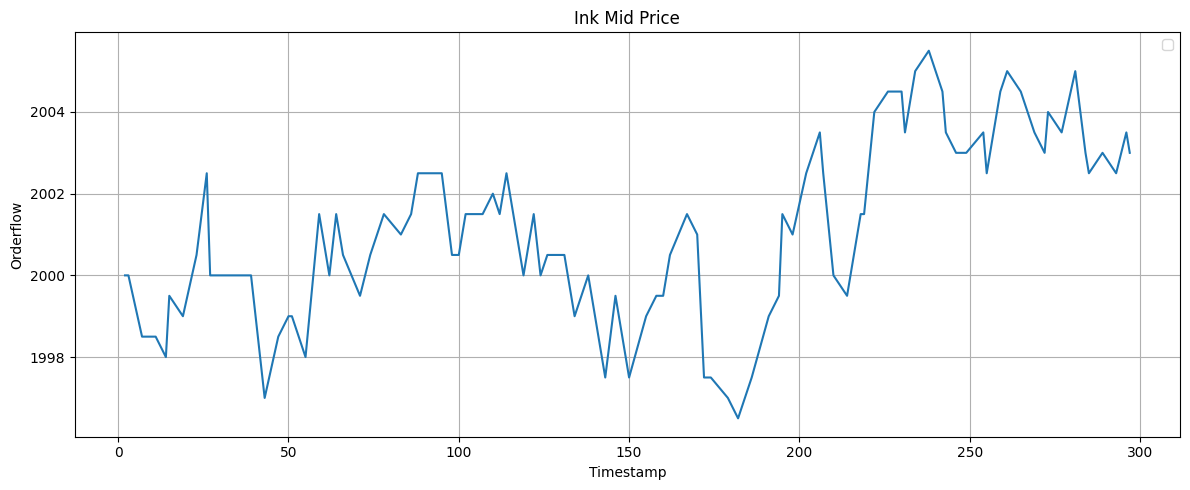

/var/folders/4r/dygtxtn155l8zwg6_s8jtpw80000gn/T/ipykernel_93616/2071845315.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


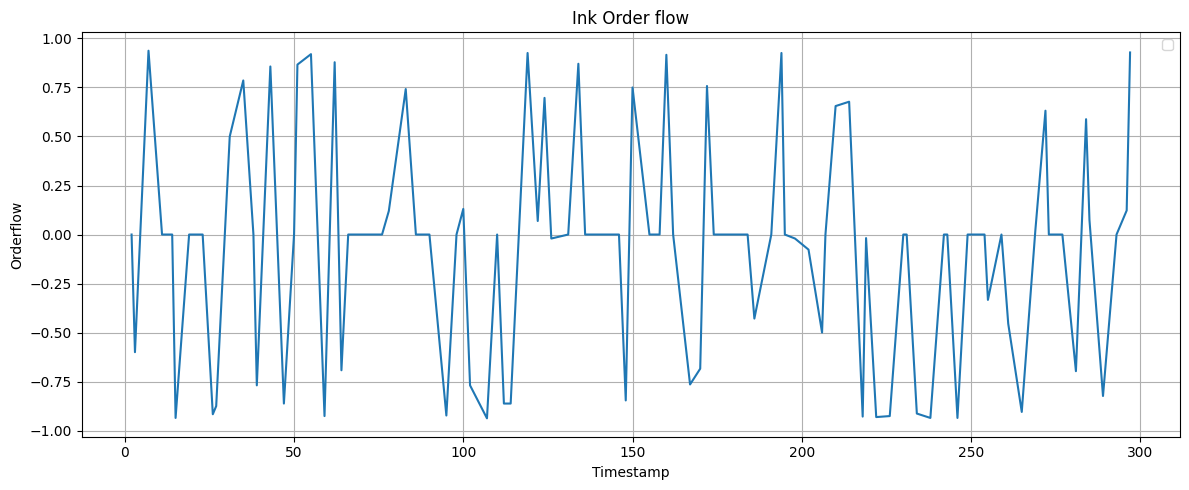

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(ink_prices.index[:100], ink_prices['mid_price'][:100])
plt.title("Ink Mid Price")
plt.xlabel("Timestamp")
plt.ylabel("Orderflow")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(ink_prices.index[:100], ink_prices['order_flow_imbalance'][:100])
plt.title("Ink Order flow")
plt.xlabel("Timestamp")
plt.ylabel("Orderflow")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



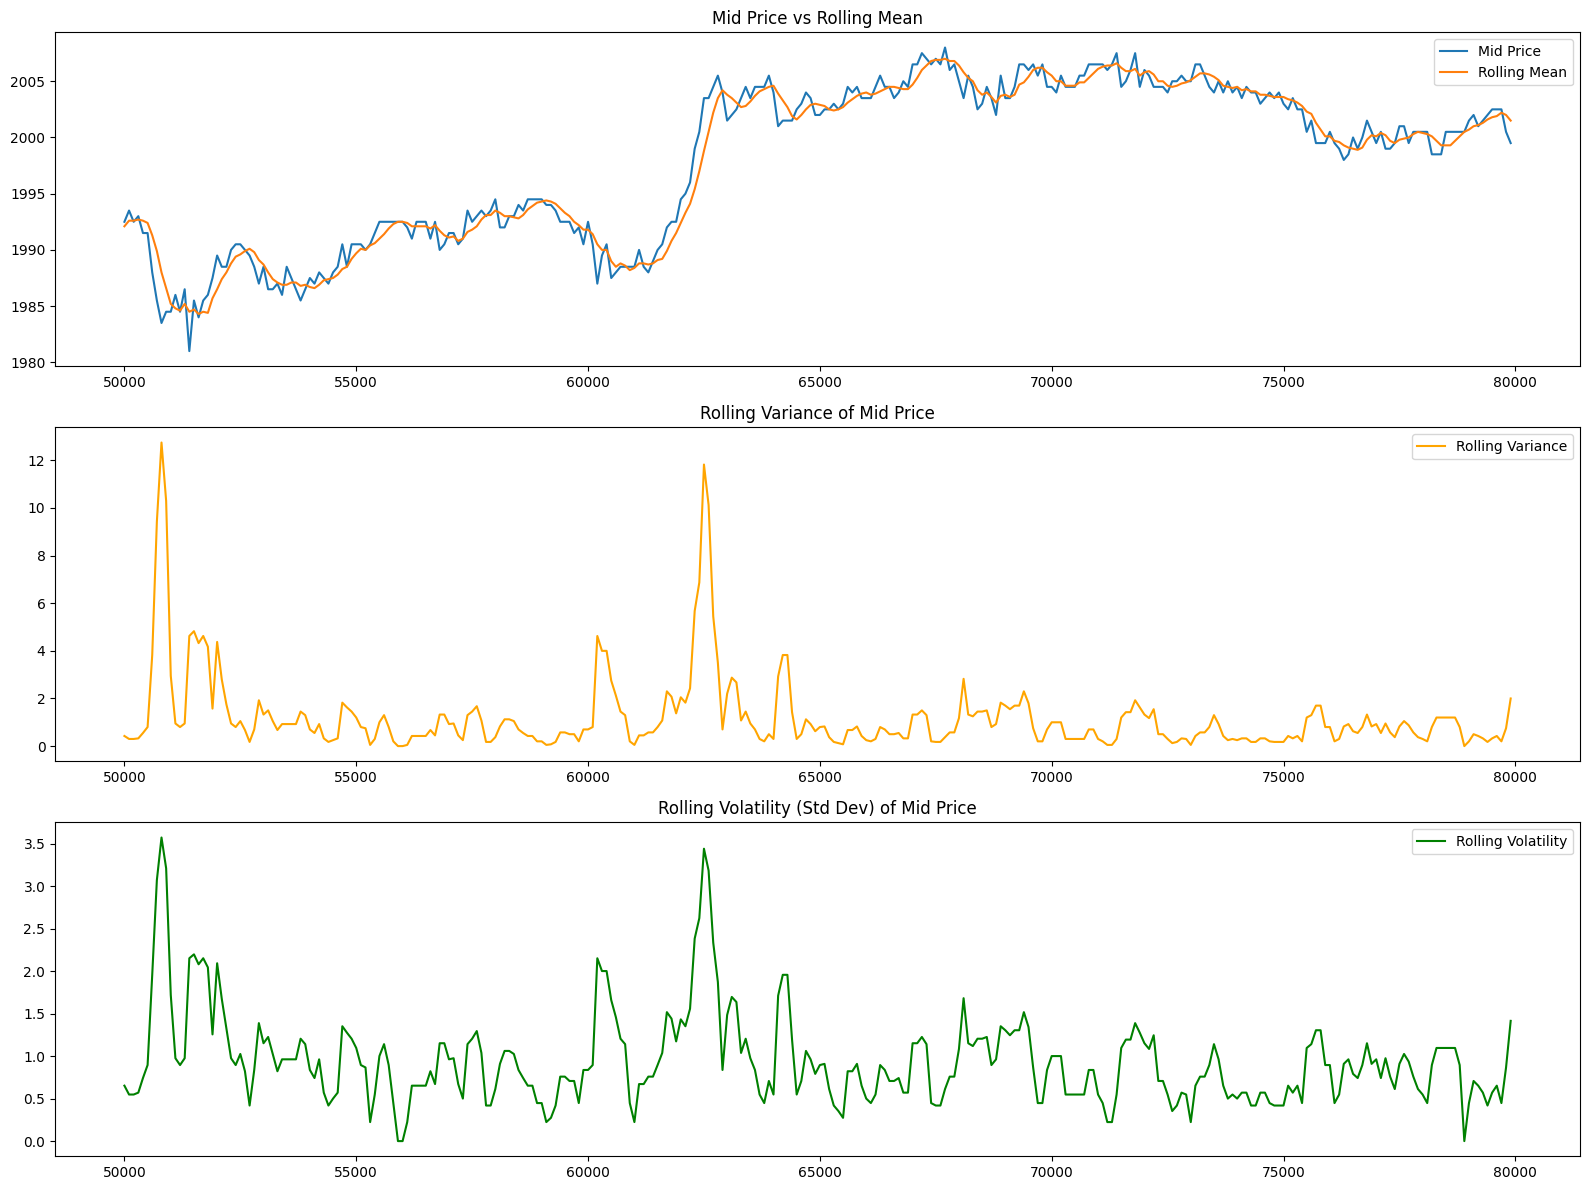

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reload the three datasets after code reset
file1 = pd.read_csv("../data_1/prices_round_1_day_-2.csv", delimiter=";")
file2 = pd.read_csv("../data_1/prices_round_1_day_-1.csv", delimiter=";")
file3 = pd.read_csv("../data_1/prices_round_1_day_0.csv", delimiter=";")

# Combine all datasets into one
prices = pd.concat([file1, file2, file3], ignore_index=True)

# Filter for SQUID_INK product
ink_prices = prices[prices["product"] == "SQUID_INK"].copy()

# Compute mid-price
ink_prices["mid_price"] = (ink_prices["bid_price_1"] + ink_prices["ask_price_1"]) / 2

# Rolling metrics
window = 5
ink_prices["rolling_mean"] = ink_prices["mid_price"].rolling(window=window).mean()
ink_prices["rolling_variance"] = ink_prices["mid_price"].rolling(window=window).var()
ink_prices["rolling_volatility"] = ink_prices["mid_price"].rolling(window=window).std()

ink_prices = ink_prices[500:800]
# Plotting
plt.figure(figsize=(16, 12))

plt.subplot(3, 1, 1)
plt.plot(ink_prices["timestamp"], ink_prices["mid_price"], label="Mid Price")
plt.plot(ink_prices["timestamp"], ink_prices["rolling_mean"], label="Rolling Mean")
plt.title("Mid Price vs Rolling Mean")
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(ink_prices["timestamp"], ink_prices["rolling_variance"], color="orange", label="Rolling Variance")
plt.title("Rolling Variance of Mid Price")
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(ink_prices["timestamp"], ink_prices["rolling_volatility"], color="green", label="Rolling Volatility")
plt.title("Rolling Volatility (Std Dev) of Mid Price")
plt.legend()

plt.tight_layout()
plt.show()


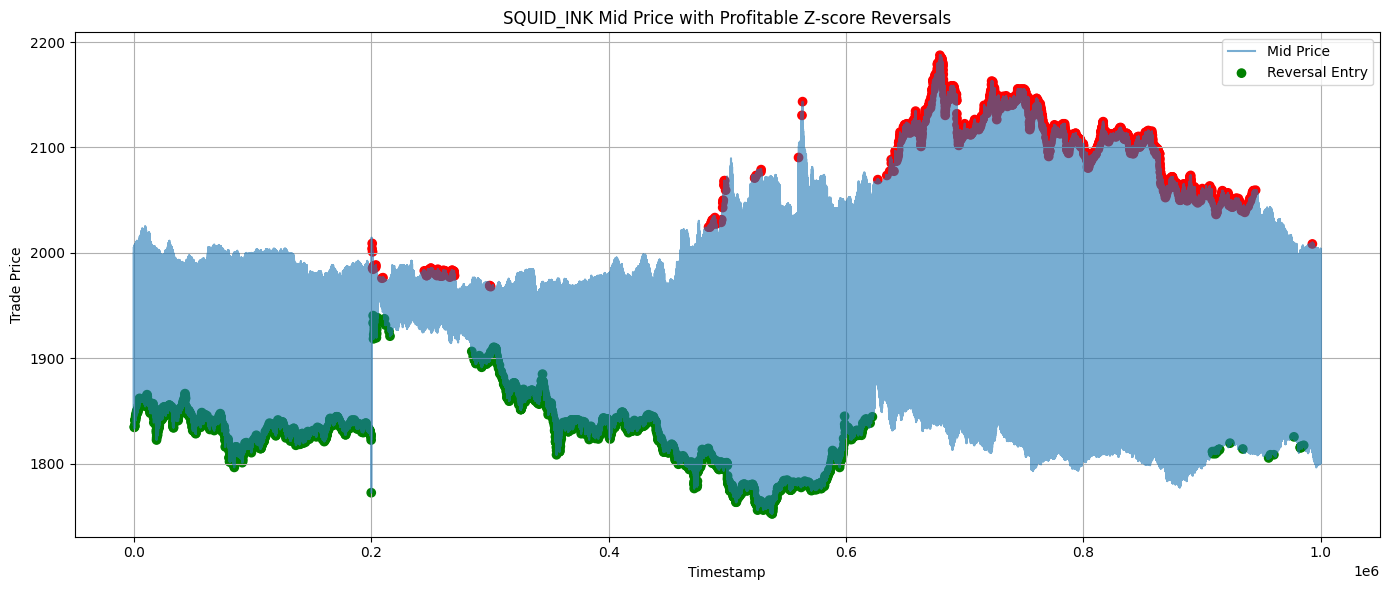

In [9]:
# Reload and parse the files correctly with semicolon delimiter
file_paths = [
    "../data_1/prices_round_1_day_-2.csv",
    "../data_1/prices_round_1_day_-1.csv",
    "../data_1/prices_round_1_day_0.csv",
    "../data_1/prices_round_2_day_-1.csv",
    "../data_1/prices_round_2_day_0.csv",
    "../data_1/prices_round_2_day_1.csv"
    ]
df_all_fixed = pd.concat([pd.read_csv(f, sep=";") for f in file_paths])

# Filter for SQUID_INK symbol
df_ink = df_all_fixed[df_all_fixed["product"] == "SQUID_INK"].copy()

# Sort by timestamp just in case
df_ink = df_ink.sort_values("timestamp")

# Calculate mid-price approximation (price = trade price for executed trades)
df_ink["mid_price"] = df_ink["mid_price"]

# Calculate rolling statistics
df_ink["rolling_mean"] = df_ink["mid_price"].rolling(window=20).mean()
df_ink["rolling_std"] = df_ink["mid_price"].rolling(window=20).std()
df_ink["zscore"] = (df_ink["mid_price"] - df_ink["rolling_mean"]) / df_ink["rolling_std"]
df_ink["momentum"] = df_ink["mid_price"].diff(5)

# Detect profitable reversals
signals = []
for i in range(25, len(df_ink)):
    z = df_ink.iloc[i]["zscore"]
    next_mid = df_ink.iloc[i+5]["mid_price"] if i+5 < len(df_ink) else df_ink.iloc[i]["mid_price"]
    current_mid = df_ink.iloc[i]["mid_price"]
    pnl = next_mid - current_mid
    if z > 1.5 and pnl < -2:
        signals.append(("short", i, z, pnl))
    elif z < -1.5 and pnl > 2:
        signals.append(("long", i, z, pnl))

signals_df = pd.DataFrame(signals, columns=["signal", "index", "zscore", "pnl"])

# Plot
plt.figure(figsize=(14, 6))
plt.plot(df_ink["timestamp"], df_ink["mid_price"], label="Mid Price", alpha=0.6)
plt.scatter(df_ink.iloc[signals_df["index"]]["timestamp"],
            df_ink.iloc[signals_df["index"]]["mid_price"],
            c=np.where(signals_df["signal"] == "long", "green", "red"),
            label="Reversal Entry")
plt.title("SQUID_INK Mid Price with Profitable Z-score Reversals")
plt.xlabel("Timestamp")
plt.ylabel("Trade Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()